# Text Classification

In [1]:
import pandas as pd
import numpy as np
from cytoolz import identity
import spacy

%precision 4
%matplotlib inline

In [2]:
nlp = spacy.load('en', disable=['tagger', 'ner', 'parser'])

## Load data

In [3]:
df = pd.read_msgpack('http://bulba.sdsu.edu/rcv1_train.dat')

In [4]:
df

,date,headline,itemid,text,sports,politics
1829,1997-01-22,Libya says plane flew to Ghana despite U.N. ban.,325883,Libya said on Wednesday a Libyan plane had flo...,False,False
1050,1997-07-06,Dirty laundry to be aired at Senate hearings.,709460,A Senate investigation into political fund-rai...,False,True
407,1996-09-08,"BA denies report of 10,000 imminent job cuts.",39622,British Airways (BA) denied on Monday a newspa...,False,False
376,1996-12-30,Gulf states could reinstate Israel boycott - p...,281305,Gulf Arab states could reinstate a boycott the...,False,False
728,1997-03-06,Volvo Belgian plant to hold Friday stoppage.,425537,Swedish vehicle maker AB Volvo said on Thursda...,False,False
1267,1997-07-08,INSTANT VIEW - German unemployment data for June.,715078,Following are economists' reactions to a repor...,False,False
1222,1997-06-20,"Germany, France sign helicopter industrial deal.",676761,French and German officials Friday signed cont...,False,False
114,1996-11-15,Izetbegovic agrees to sack Minister - U.S..,192047,Bosnia's president bowed to U.S. pressure on F...,False,True
2086,1996-09-27,FEATURE - Telecom gets pre-election nerves.,82618,"Two weeks before a general election, New Zeala...",False,True
151,1997-03-06,Healthy Yeltsin cheers investors in Russia.,423451,A healthy-looking Russian President Boris Yelt...,False,True


## Tokenize

In [5]:
def tokenize(text):
    return [tok.orth_ for tok in nlp.tokenizer(text)]
df['tokens'] = df['text'].apply(tokenize)

## Import sklearn

In [6]:
from sklearn.model_selection import *
from sklearn.naive_bayes import *
from sklearn.linear_model import *
from sklearn.dummy import *
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import *
from sklearn.model_selection import *

## Document-term matrix

In [7]:
V = CountVectorizer(analyzer=identity)
X = V.fit_transform(df['tokens'])

In [8]:
V.inverse_transform(X[0])

[array(['repeated', 'were', 'violations', 'if', 'curbs', 'tougher',
        'recommending', 'consider', 'would', 'warned', 'After', 'June',
        'summit', 'attend', 'back', 'Cairo', 'Gaddafi', 'Muammar', 'leader',
        'registered', '1996', '1995', 'Arabia', 'Saudi', 'pilgrims',
        'Moslem', 'flew', '--', 'broken', 'India', 'flight', 'world',
        'around', 'attempted', 'his', 'short', 'cut', 'him', 'forced',
        'fuel', 'loss', 'detour', 'though', 'minutes', '45', 'hour', 'he',
        'Chicago', 'centre', 'control', 'According', 'changed', 'later',
        'but', 'country', 'denied', 'first', 'hot', 'lot', 'saying',
        'claim', 'rejected', 'Tuesday', 'source', 'committee', 'U.N.', 'A',
        'council', 'document', 'as', 'circulated', 'be', 'asked',
        'chairman', 'position', 'Tripoli', 'out', 'setting', 'letter',
        'handed', 'diplomat', 'cross', 'Fossett', 'Steve', 'citizen',
        'U.S.', 'permitted', 'states', 'from', 'aircraft', 'airspace',
  

## Baseline model

Simplest predictor: most articles aren't about sports, so what if we guess that none of them are?

In [9]:
sum(df['sports']==True), len(df)

(2562, 15000)

In [10]:
model = make_pipeline(CountVectorizer(analyzer=identity), DummyClassifier('most_frequent'))     
score = cross_val_score(model, df['tokens'], df['sports'], cv=5, n_jobs=-1)
score.mean(), score.std()

(0.8292, 0.0001)

## Simple NB

Bernoulli Naive Bayes

In [11]:
model = make_pipeline(CountVectorizer(analyzer=identity), BernoulliNB())     
score = cross_val_score(model, df['tokens'], df['sports'], cv=5, n_jobs=-1)
score.mean(), score.std()

(0.9809, 0.0014)

## Feature pruning

Very rare or very common words usually don't help very much with prediction and make learning more expensive, so skipping them sometimes improve results

In [12]:
model = make_pipeline(CountVectorizer(min_df=2, max_df=0.5, analyzer=identity), BernoulliNB())     
score = cross_val_score(model, df['tokens'], df['sports'], cv=5, n_jobs=-1)
score.mean(), score.std()

(0.9823, 0.0012)

## Hyperparameters

What are the optimal values of `min_df` and `max_df`?

In [13]:
model = make_pipeline(CountVectorizer(analyzer=identity), BernoulliNB())     
params = {'countvectorizer__min_df':[1, 2, 5, 10, 25]}
grid_search = GridSearchCV(model, params, n_jobs=-1, verbose=1, return_train_score=True)
grid_search.fit(df['tokens'], df['sports'])   

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   27.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer=<cyfunction identity at 0x7f961a702a58>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), prepr...ary=None)), ('bernoullinb', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'countvectorizer__min_df': [1, 2, 5, 10, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [14]:
grid_search.best_score_, grid_search.best_params_

(0.9805, {'countvectorizer__min_df': 1})

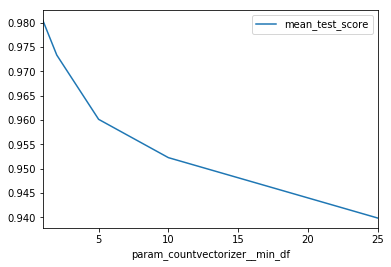

In [15]:
grid = pd.DataFrame(grid_search.cv_results_, dtype=float)
grid.plot.line('param_countvectorizer__min_df', 'mean_test_score')

## Hyperparameters

In [16]:
model = make_pipeline(CountVectorizer(analyzer=identity), BernoulliNB())     
params = {'countvectorizer__max_df':[0.01, 0.1, 0.5, 1.0]}
grid_search = GridSearchCV(model, params, n_jobs=-1, verbose=1, return_train_score=True)
grid_search.fit(df['tokens'], df['sports'])   

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:   19.9s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   22.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer=<cyfunction identity at 0x7f961a702a58>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), prepr...ary=None)), ('bernoullinb', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'countvectorizer__max_df': [0.01, 0.1, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [17]:
grid_search.best_score_, grid_search.best_params_

(0.9838, {'countvectorizer__max_df': 0.5000})

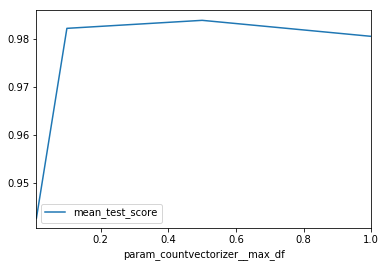

In [18]:
grid = pd.DataFrame(grid_search.cv_results_, dtype=float)
grid.plot.line('param_countvectorizer__max_df', 'mean_test_score')

## Inspect features

In [19]:
train = df[:10000]
test = df[10000:]

In [20]:
V = CountVectorizer(max_df=0.25, analyzer=identity)
model = BernoulliNB()
model.fit(V.fit_transform(train['tokens']), train['sports'])
model.score(V.transform(test['tokens']), test['sports'])

0.9840

In [21]:
w = model.feature_log_prob_[0] / model.feature_log_prob_[1]
[V.get_feature_names()[f] for f in w.argsort()[-20:]]

['finals',
 'championships',
 'striker',
 'game',
 'tournament',
 'wickets',
 'halftime',
 '1',
 '4',
 'innings',
 'Standings',
 'coach',
 'league',
 'championship',
 '2',
 '3',
 'match',
 'matches',
 '0',
 'Cup']

In [22]:
pred = model.predict(V.transform(test['tokens']))

In [23]:
wrong = test[test['sports']!=pred]
wrong

,date,headline,itemid,text,sports,politics,tokens
99,1997-02-04,SOCCER-GERMANS ATTACK ENGLAND OVER RIVAL WORLD...,353403,German soccer chiefs attacked England on Tuesd...,True,False,"[German, soccer, chiefs, attacked, England, on..."
683,1996-12-10,MOTOR RACING-STEWART LAUNCH NEW FORMULA ONE CAR.,245590,Formula One newcomers Stewart-Ford unveiled th...,True,False,"[Formula, One, newcomers, Stewart, -, Ford, un..."
309,1997-02-02,SOCCER-UEFA CLAIM ENGLAND KNEW OF WORLD CUP PLAN.,349545,England soccer authorities insisted on Sunday ...,True,False,"[England, soccer, authorities, insisted, on, S..."
1207,1997-06-03,SOCCER-AUSTRIA TO BID FOR EURO 2004 WITH HUNGARY.,632920,The Austrian government on Tuesday pledged its...,True,False,"[The, Austrian, government, on, Tuesday, pledg..."
1590,1997-01-16,"CYCLING-DOPING WIDESPREAD IN PRO RACING, RIDER...",311126,Doping has become commonplace in professional ...,True,False,"[Doping, has, become, commonplace, in, profess..."
790,1996-09-20,"OLYMPICS-CROOKS WILL NOT HARM RIO'S 2004 BID, ...",66496,Rio de Janeiro's reputation as a city teeming ...,True,False,"[Rio, de, Janeiro, 's, reputation, as, a, city..."
1512,1997-03-05,Swingley in front of Iditarod race pack.,420601,Montana musher Doug Swingley held an eight-min...,True,False,"[Montana, musher, Doug, Swingley, held, an, ei..."
902,1997-08-05,SOCCER-STEAUA EYES DIVORCE FROM ROMANIA MILITARY.,778104,Romania's top soccer club Steaua Bucharest is ...,True,False,"[Romania, 's, top, soccer, club, Steaua, Bucha..."
405,1997-03-10,MOTOR RACING-DIGITAL TV DRIVES FORMULA ONE FLO...,429678,"Formula One, revving up on Monday for a flotat...",True,False,"[Formula, One, ,, revving, up, on, Monday, for..."
678,1997-03-04,MOTOR RACING-WALKER MAINTAINS ATTACKS ON SCHUM...,416968,Australian Grand Prix chief Ron Walker continu...,True,False,"[Australian, Grand, Prix, chief, Ron, Walker, ..."


In [24]:
wrong['text'][99]

'German soccer chiefs attacked England on Tuesday for not consulting them before the country decided on a rival European bid for the 2006 World Cup finals. The German soccer federation (DFB), caught up in a row which also involves England and Europe\'s governing body UEFA over bidding for the event, said it had announced back in 1993 that it would try to get the finals. It feels the English Football Association (F.A.) should have told Germany of its intentions before it expressed interest in the event much later following the country\'s successful hosting of last year\'s European championship. "You have to ask the question whether a country should go to a partner and tell them rather than let them be informed through the media," DFB spokesman Wolfgang Niersbach said. "It is normal that countries should talk to each other. I told (F.A. official) David Davies that we are not happy that things started like this. It shouldn\'t happen like that. "Perhaps it is forgotten but (DFB chief) Egid

In [25]:
wrong['text'][693]

"Democratic President Bill Clinton had won 18 states and 206 electoral votes in the presidential election, according to projections by major news organisations as of 8:27 p.m. EST (0127 GMT). In comparison, Republican challenger Bob Dole was projected the victor in six states with 74 electoral votes. The 50 U.S. states and the District of Columbia have 538 votes. A candidate needs 270 of these electoral votes to win the election. DC, with three electoral votes, is included in Clinton's state tally. U.S. Presidential Election - State Vote 1996 vs 1992 Snapshot at 8:27 p.m. EST (0127 GMT) Electoral State Votes 1996 1992 ----- ----- ---- ---- ALABAMA 9 Dole Bush ALASKA 3 ---------- Bush ARIZONA 8 ---------- Bush ARKANSAS 6 ---------- Clinton CALIFORNIA 54 ---------- Clinton COLORADO 8 ---------- Clinton CONNECTICUT 8 Clinton Clinton DELAWARE 3 Clinton Clinton DISTRICT OF COLUMBIA 3 Clinton Clinton FLORIDA 25 Clinton Bush GEORGIA 13 ---------- Clinton HAWAII 4 ---------- Clinton IDAHO 4 --

## Try politics

In [26]:
model = make_pipeline(CountVectorizer(analyzer=identity), DummyClassifier('most_frequent'))     
score = cross_val_score(model, df['tokens'], df['politics'], cv=5, n_jobs=-1)
score.mean(), score.std()

(0.7135, 0.0001)

In [27]:
model = make_pipeline(CountVectorizer(analyzer=identity), BernoulliNB())     
score = cross_val_score(model, df['tokens'], df['politics'], cv=5, n_jobs=-1)
score.mean(), score.std()

(0.8153, 0.0063)

## Your task

Develop classifiers that improve on these scores for both sports and politics articles.  Some things to try changing:

* hyperparameters for feature selection and classifiers
* alternate tokenization
* TfidfTransformer
* MultinomialNB